## Initialization

In [379]:
import numpy as np
from scipy.stats import kstest, norm, expon, pareto
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import expon, norm, pareto
from scipy.stats import chi2
np.random.seed(1234)


## 1) Generate Simulated Values
- Generate simulated values from the exponential, Normal (with Box-muller) and pareto distribution

Text(0, 0.5, 'Density')

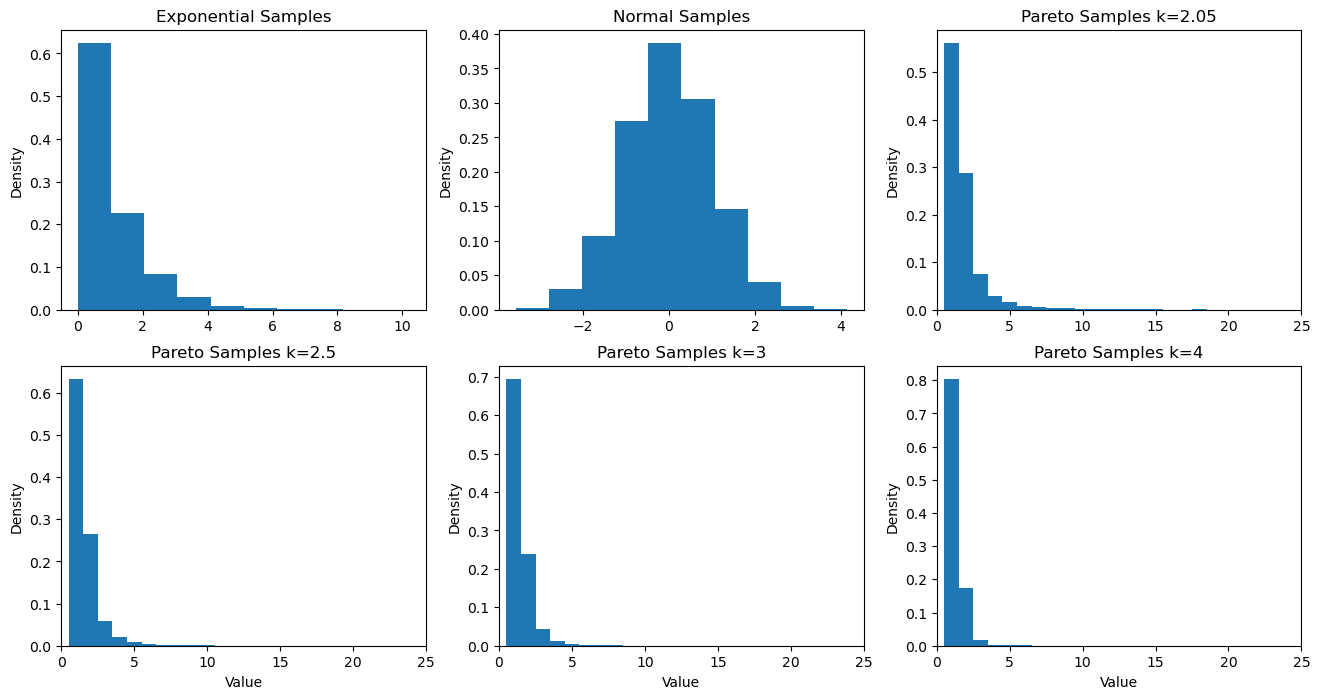

In [380]:
# Initialize parameters:
N = 10000
B = 1
k = [2.05,2.5,3,4]

#Exponential distribution
Sample_Exp = np.random.exponential(scale=1.0, size=N)

#Normal distribution - Box-Mueller 
u1 = np.random.uniform(0, 1, N)
u2 = np.random.uniform(0, 1, N)
Sample_Norm = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)

figure, axis = plt.subplots(2, 3,figsize=(16, 8)) 

# plot sample 
axis[0,0].hist(Sample_Exp,density=True)
axis[0,0].set_title('Exponential Samples')
axis[0,0].set_ylabel('Density')

axis[0,1].hist(Sample_Norm,density=True)
axis[0,1].set_title('Normal Samples')
axis[0,1].set_ylabel('Density')

Sample_pareto_k1 = (np.random.pareto(a=k[0], size=N) + B) * 1
axis[0,2].hist(Sample_pareto_k1, bins=np.arange(1, max(Sample_pareto_k1) + 1) - 0.5,density=True)
axis[0,2].set_title(f'Pareto Samples k={k[0]}')
axis[0,2].set_xlim(0, 25)
axis[0,2].set_ylabel('Density')

Sample_pareto_k2 = (np.random.pareto(a=k[1], size=N) + B) * 1
axis[1,0].hist(Sample_pareto_k2, bins=np.arange(1, max(Sample_pareto_k2) + 1) - 0.5,density=True)
axis[1,0].set_title(f'Pareto Samples k={k[1]}')
axis[1,0].set_xlim(0, 25)
axis[1,0].set_xlabel('Value')
axis[1,0].set_ylabel('Density')

Sample_pareto_k3 = (np.random.pareto(a=k[2], size=N) + B) * 1
axis[1,1].hist(Sample_pareto_k3, bins=np.arange(1, max(Sample_pareto_k3) + 1) - 0.5,density=True)
axis[1,1].set_title(f'Pareto Samples k={k[2]}')
axis[1,1].set_xlim(0, 25)
axis[1,1].set_xlabel('Value')
axis[1,1].set_ylabel('Density')

Sample_pareto_k4 = (np.random.pareto(a=k[3], size=N) + B) * 1
axis[1,2].hist(Sample_pareto_k4, bins=np.arange(1, max(Sample_pareto_k3) + 1) - 0.5,density=True)
axis[1,2].set_title(f'Pareto Samples k={k[3]}')
axis[1,2].set_xlim(0, 25)
axis[1,2].set_xlabel('Value')
axis[1,2].set_ylabel('Density')




In [381]:

d_statistic, p_value = kstest(Sample_Exp, 'expon')
print('K-S test: Exponential')
print(f'D = {d_statistic:.4f}, p-value = {p_value:.4f}' )
print('')

d_statistic, p_value = kstest(Sample_Norm, 'norm')
print('K-S test: Normal')
print(f'D = {d_statistic:.4f}, p-value = {p_value:.4f}' )
print('')

pareto_Samples = [Sample_pareto_k1, Sample_pareto_k2, Sample_pareto_k3, Sample_pareto_k4]

for i in range(4):
    d_statistic, p_value = kstest(pareto_Samples[i], 'pareto', (k[i],))
    print(f'K-S test: Pareto Samples k={k[i]}')
    print(f'D = {d_statistic:.4f}, p-value = {p_value:.4f}' )
    print('')


K-S test: Exponential
D = 0.0064, p-value = 0.8065

K-S test: Normal
D = 0.0080, p-value = 0.5392

K-S test: Pareto Samples k=2.05
D = 0.0073, p-value = 0.6631

K-S test: Pareto Samples k=2.5
D = 0.0075, p-value = 0.6296

K-S test: Pareto Samples k=3
D = 0.0138, p-value = 0.0437

K-S test: Pareto Samples k=4
D = 0.0058, p-value = 0.8910



## 2) Mean and Variance of Pareto Distribution
- Compare mean and Variance of pareto distribution with analytical results.

In [382]:
def analytical_mean(k, beta):
    return beta * k / (k - 1)

def analytical_variance(k, beta):
    return beta**2 * k / ((k - 1)**2 * (k - 2))

def empirical_mean_variance(samples):
    return np.mean(samples), np.var(samples)

# Generate samples and compare
results = {}
for k in k:
    samples = (np.random.pareto(a=k, size=10000) + 1) * B
    emp_mean, emp_var = empirical_mean_variance(samples)
    
    ana_mean = analytical_mean(k, B)
    ana_var = analytical_variance(k, B)
    
    results[k] = {
        "Empirical Mean": emp_mean,
        "Analytical Mean": ana_mean,
        "Empirical Variance": emp_var,
        "Analytical Variance": ana_var
    }

# Print results
for k, res in results.items():
    print(f"\nPareto Distribution (k={k}):")
    for key, value in res.items():
        print(f"{key}: {value}")


Pareto Distribution (k=2.05):
Empirical Mean: 1.9469958327656427
Analytical Mean: 1.9523809523809526
Empirical Variance: 9.922774247366187
Analytical Variance: 37.18820861678019

Pareto Distribution (k=2.5):
Empirical Mean: 1.6598023328621083
Analytical Mean: 1.6666666666666667
Empirical Variance: 1.6769901488091026
Analytical Variance: 2.2222222222222223

Pareto Distribution (k=3):
Empirical Mean: 1.512139219687066
Analytical Mean: 1.5
Empirical Variance: 0.785427934795459
Analytical Variance: 0.75

Pareto Distribution (k=4):
Empirical Mean: 1.3329316116293295
Analytical Mean: 1.3333333333333333
Empirical Variance: 0.2581563833718488
Analytical Variance: 0.2222222222222222


## 3) 95-conf inteval for Normal dist
- Generate 100 95% conf intevals for mean and variance, each based on 10 observations

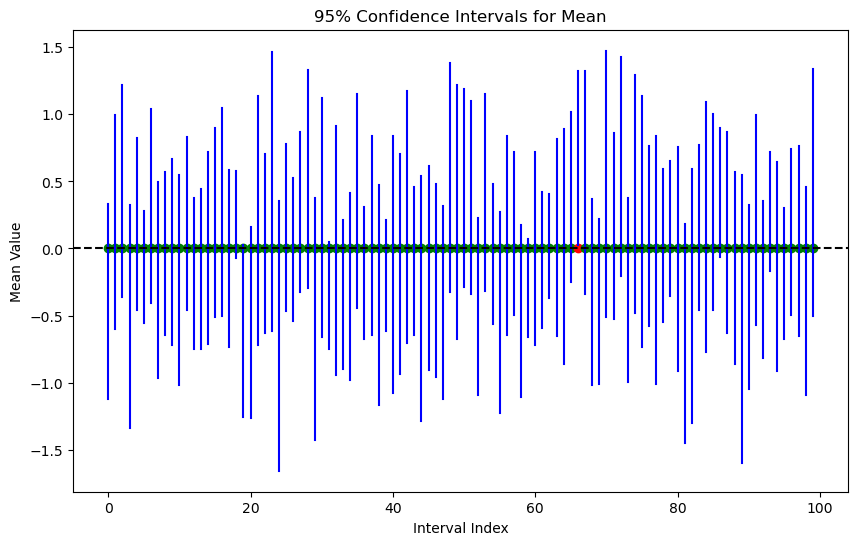

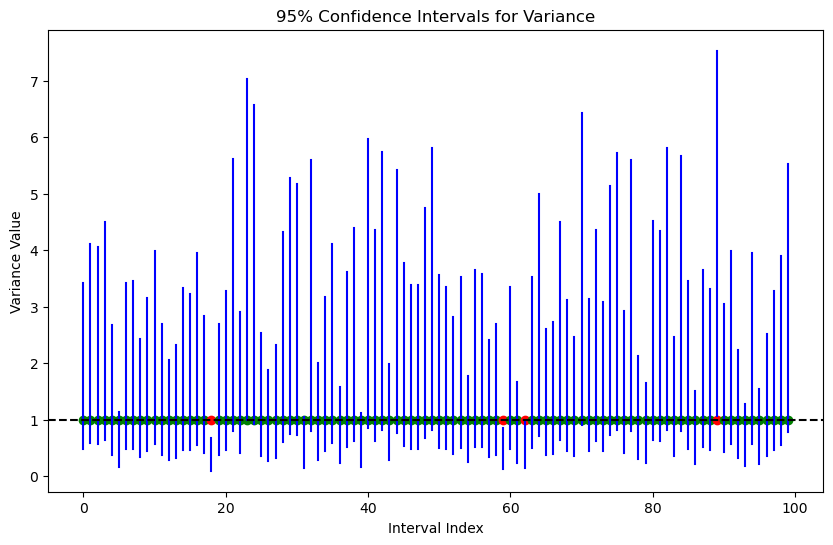

Proportion of 95% confidence intervals for the mean that contain the true mean: 0.99
Proportion of 95% confidence intervals for the variance that contain the true variance: 0.96


In [383]:
N_int = 100
N_obs = 10
conf_level = 0.95

# Function to calculate confidence intervals
def confidence_intervals(samples, confidence_level):
    n = len(samples)
    sample_mean = np.mean(samples)
    sample_variance = np.var(samples, ddof=1)
    
    # Mean confidence interval
    mean_se = np.sqrt(sample_variance / n)
    mean_ci = stats.t.interval(confidence_level, df=n-1, loc=sample_mean, scale=mean_se)
    
    # Variance confidence interval
    chi2_lower = stats.chi2.ppf((1 - confidence_level) / 2, df=n-1)
    chi2_upper = stats.chi2.ppf((1 + confidence_level) / 2, df=n-1)
    var_ci = ((n - 1) * sample_variance / chi2_upper, (n - 1) * sample_variance / chi2_lower)
    
    return mean_ci, var_ci

# Generate intervals
mean_intervals = []
var_intervals = []

for _ in range(N_int):
    samples = np.random.normal(loc=0, scale=np.sqrt(1), size=N_obs)
    mean_ci, var_ci = confidence_intervals(samples, conf_level)
    mean_intervals.append(mean_ci)
    var_intervals.append(var_ci)

# Plot results for mean confidence intervals
plt.figure(figsize=(10, 6))
for i, (lower, upper) in enumerate(mean_intervals):
    plt.plot([i, i], [lower, upper], color='blue')
    if lower <= 0 <= upper:
        plt.scatter(i, 0, color='green')
    else:
        plt.scatter(i, 0, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('95% Confidence Intervals for Mean')
plt.xlabel('Interval Index')
plt.ylabel('Mean Value')
plt.show()

# Plot results for variance confidence intervals
plt.figure(figsize=(10, 6))
for i, (lower, upper) in enumerate(var_intervals):
    plt.plot([i, i], [lower, upper], color='blue')
    if lower <= 1 <= upper:
        plt.scatter(i, 1, color='green')
    else:
        plt.scatter(i, 1, color='red')
plt.axhline(1, color='black', linestyle='--')
plt.title('95% Confidence Intervals for Variance')
plt.xlabel('Interval Index')
plt.ylabel('Variance Value')
plt.show()

# Calculate the proportion of intervals that contain the true mean and variance
mean_containment = np.mean([lower <= 0 <= upper for lower, upper in mean_intervals])
variance_containment = np.mean([lower <= 1 <= upper for lower, upper in var_intervals])

print(f"Proportion of 95% confidence intervals for the mean that contain the true mean: {mean_containment:.2f}")
print(f"Proportion of 95% confidence intervals for the variance that contain the true variance: {variance_containment:.2f}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Area under the histogram: 1.0


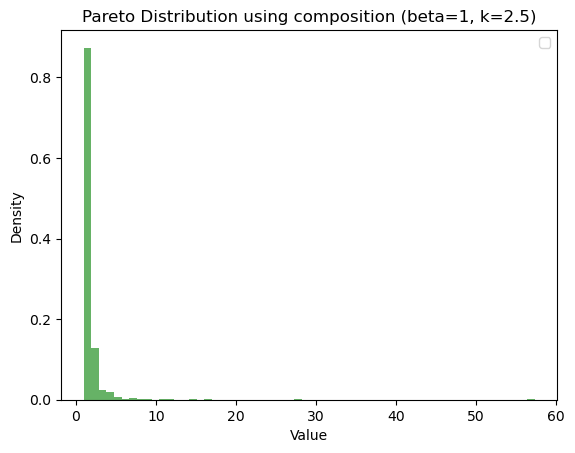

K-S test: Pareto Samples k=2.5
D = 0.0206, p-value = 0.7837


In [384]:
# Parameters
beta = 1
k = 2.5
n_samples = 1000

# Generate uniform random variables
u = np.random.uniform(0, 1, n_samples)

# Transform using the correct inverse CDF for Pareto distribution
pareto_samples = beta * (1 / u) ** (1 / k)

# Create the histogram
counts, bins, _ = plt.hist(pareto_samples, bins=60, density=True, alpha=0.6, color='g')

# Calculate the area under the histogram
bin_widths = np.diff(bins)
area = np.sum(counts * bin_widths)

# Display the area
print(f'Area under the histogram: {area}')

# Plot the histogram
plt.title(f'Pareto Distribution using composition (beta={beta}, k={k})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

d_statistic, p_value = kstest(pareto_samples, 'pareto', (2.5,))
print(f'K-S test: Pareto Samples with composition k={2.5}')
print(f'D = {d_statistic:.4f}, p-value = {p_value:.4f}' )